In [180]:
import pandas as pd
import numpy as np
import sklearn
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import statsmodels.api as sm

In [199]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [172]:
data=pd.read_csv("C:\\Users\\kiril\\Downloads\\adult\\adult.data",header=None)

In [173]:
data=pd.DataFrame(data)

In [174]:
names=["age","workclass",'fnlwgt','education','marital_status','occupation','specialty','relationship','race','sex','capital-gain','capital-loss','hours_per_week','native_country','income']

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [176]:
data.columns=names

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   marital_status  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   specialty       32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [143]:
education_coded={' Preschool': 1, ' 1st-4th': 2, ' 5th-6th': 3, ' 7th-8th': 4, ' 9th': 5,
    ' 10th': 6, ' 11th': 7, ' 12th': 8, ' HS-grad': 9, ' Some-college': 10,
    ' Assoc-voc': 11, ' Assoc-acdm': 12, ' Bachelors': 13,
    ' Masters': 14, ' Prof-school': 15, ' Doctorate': 16}

In [144]:
data['education']=data['education'].map(education_coded)

In [145]:
data = pd.get_dummies(data, columns=['race', 'sex'], drop_first=False)

In [179]:
data['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [147]:
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [148]:
target_encode={
    " <=50K":0,
    " >50K":1
}
data['income']=data['income'].map(target_encode)
data['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [149]:
data['specialty'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [150]:
data['specialty']=data['specialty'].str.strip()
data['specialty'].replace('?', np.nan, inplace=True)
data['specialty'].fillna('Unknown', inplace=True)
data['specialty'].unique()
data = pd.get_dummies(data, columns=['specialty'], prefix='job', drop_first=False)

C:\Users\kiril\AppData\Local\Temp\ipykernel_44228\2714093567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['specialty'].replace('?', np.nan, inplace=True)
C:\Users\kiril\AppData\Local\Temp\ipykernel_44228\2714093567.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [151]:
print(data['workclass'].unique())
print(data['occupation'].unique())
print(data['relationship'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [152]:
data['workclass']=data['workclass'].str.strip()
data['workclass'].replace('?', np.nan, inplace=True)
data['workclass'].fillna('Unknown', inplace=True)
data['workclass'].unique()
data = pd.get_dummies(data, columns=['workclass'], drop_first=False)

C:\Users\kiril\AppData\Local\Temp\ipykernel_44228\3239554054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace('?', np.nan, inplace=True)
C:\Users\kiril\AppData\Local\Temp\ipykernel_44228\3239554054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [153]:
data['occupation']=data['occupation'].str.strip()
data = pd.get_dummies(data, columns=['occupation'], drop_first=False)

In [155]:
data['relationship']=data['relationship'].str.strip()
data = pd.get_dummies(data, columns=['relationship'], drop_first=False)

In [156]:
data['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [157]:
country_counts = data['native_country'].value_counts()
rare_countries = country_counts[country_counts < 100].index
data['native_country'] = data['native_country'].replace(rare_countries, 'Other')

In [158]:
data['native_country'].value_counts()

native_country
 United-States    29170
Other              1389
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
Name: count, dtype: int64

In [159]:
data['native_country']=data['native_country'].str.strip()
data['native_country'].replace('?', np.nan, inplace=True)
data['native_country'].fillna('Unknown', inplace=True)
data = pd.get_dummies(data, columns=['native_country'], drop_first=False)

C:\Users\kiril\AppData\Local\Temp\ipykernel_44228\2929284721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native_country'].replace('?', np.nan, inplace=True)
C:\Users\kiril\AppData\Local\Temp\ipykernel_44228\2929284721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [160]:
data

,age,fnlwgt,education,marital_status,capital-gain,capital-loss,hours_per_week,income,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,...,native_country_Canada,native_country_El-Salvador,native_country_Germany,native_country_India,native_country_Mexico,native_country_Other,native_country_Philippines,native_country_Puerto-Rico,native_country_United-States,native_country_Unknown
0,39,77516,13,13,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,False,True,False
1,50,83311,13,13,0,0,13,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,38,215646,9,9,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,234721,7,7,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,338409,13,13,0,0,40,0,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,12,0,0,38,0,False,False,...,False,False,False,False,False,False,False,False,True,False
32557,40,154374,9,9,0,0,40,1,False,False,...,False,False,False,False,False,False,False,False,True,False
32558,58,151910,9,9,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,True,False
32559,22,201490,9,9,0,0,20,0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [162]:
X = data.drop(['income','marital_status'], axis=1)
y=data['income']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)[:,1]
threshold= 0.4
y_pred_adj = (y_probs >= threshold).astype(int)

In [187]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8545984953170582
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.62      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [188]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print(f'F1 scores for each fold: {cv_scores}')
print(f'Average F1 score: {cv_scores.mean():}')

F1 scores for each fold: [0.7968678  0.7919226  0.79376536 0.79422604 0.79960074]
Average F1 score: 0.7952765089741138


In [167]:
param_grid = {
    'max_depth': [3, 5, 7],          
    'min_child_weight': [1, 3, 5],   
    'gamma': [0, 0.1, 0.2],          
    'subsample': [0.8, 1],           
    'colsample_bytree': [0.8, 1],    
    'learning_rate': [0.01, 0.1],    
    'n_estimators': [100, 200]       
}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X, y)
print("Best parameters found: ", grid_search.best_params_)
print(f"Best F1 score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best F1 score: 0.8748


In [190]:
best_parameters = {
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.8,
    'use_label_encoder': False,
    'eval_metric': 'logloss' 
}
final_model = XGBClassifier(**best_parameters)
final_model.fit(X_train, y_train)

C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [23:04:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [191]:
y_pred_final = final_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):}")
print(f"F1 Score: {f1_score(y_test, y_pred_final):}")
print(classification_report(y_test, y_pred_final))

Accuracy: 0.8545984953170582
F1 Score: 0.7319904404233527
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.79      0.68      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.83      6513
weighted avg       0.88      0.88      0.88      6513



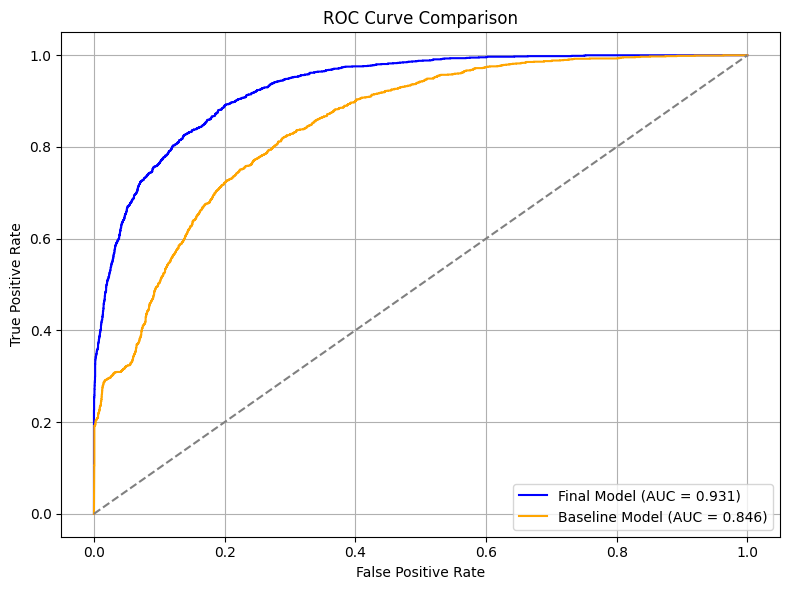

In [198]:
final_probs = final_model.predict_proba(X_test)[:, 1]
baseline_probs = model.predict_proba(X_test)[:, 1]
fpr_final, tpr_final, _ = roc_curve(y_test, final_probs)
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, baseline_probs)
auc_final = auc(fpr_final, tpr_final)
auc_baseline = auc(fpr_baseline, tpr_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, label=f'Final Model (AUC = {auc_final:.3f})', color='blue')
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline Model (AUC = {auc_baseline:.3f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [183]:
model_log = LogisticRegression(max_iter=1000, solver='lbfgs')
model_log.fit(X_train, y_train)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_log, X, y, cv=skf, scoring='accuracy')
print(f"Cross-validated Accuracy scores: {scores}")
print(f"Average Accuracy: {scores.mean():}")

C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-validated Accuracy scores: [0.83816981 0.83860565 0.83522727 0.8379914  0.84336609]
Average Accuracy: 0.8387


C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
X_log = X.astype(int)

In [129]:
X_log=X_log.drop(['native_country_Canada', 'native_country_El-Salvador',	'native_country_Germany','native_country_India', 'native_country_Mexico', 'native_country_Other','native_country_Philippines',	'native_country_Puerto-Rico',	'native_country_United-States',	'native_country_Unknown'], axis=1)


In [131]:
X_sm = sm.add_constant(X_log)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.318087
         Iterations: 35


C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                32561
Model:                          Logit   Df Residuals:                    32518
Method:                           MLE   Df Model:                           42
Date:                Fri, 13 Jun 2025   Pseudo R-squ.:                  0.4238
Time:                        12:52:43   Log-Likelihood:                -10357.
converged:                      False   LL-Null:                       -17974.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -9.0708      0.395    -22.981      0.000      -9.844      -8.297
age                                  0.0263      0.002     16.232

In [132]:
scores = cross_val_score(model, X, y, cv=skf, scoring='f1')

C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [197]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("KNN Classifier")
print(f"Accuracy: {accuracy_score(y_test, knn_pred):.4f}")
print(classification_report(y_test, knn_pred))

gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)  
gnb_pred = gnb_model.predict(X_test_scaled)
print("Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, gnb_pred):.4f}")
print(classification_report(y_test, gnb_pred))

KNN Classifier
Accuracy: 0.8300
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4942
           1       0.68      0.56      0.61      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513

Gaussian Naive Bayes
Accuracy: 0.5441
              precision    recall  f1-score   support

           0       0.97      0.41      0.58      4942
           1       0.34      0.96      0.50      1571

    accuracy                           0.54      6513
   macro avg       0.65      0.68      0.54      6513
weighted avg       0.82      0.54      0.56      6513



C:\Users\kiril\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


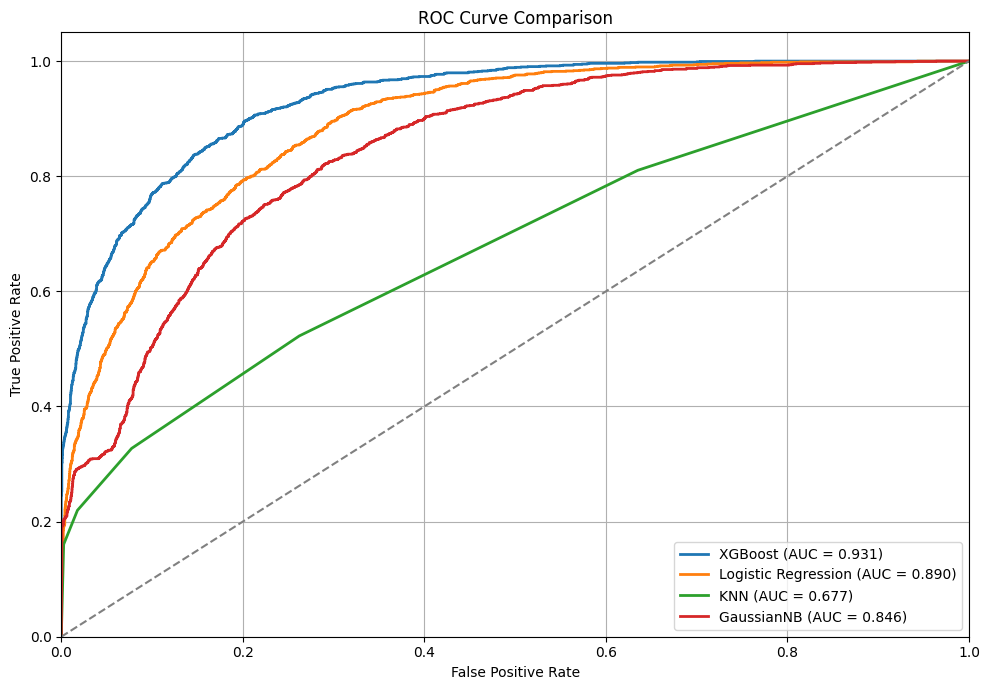

In [185]:
models = {
    "XGBoost": final_model,
    "Logistic Regression": model_log,
    "KNN": knn_model,
    "GaussianNB": gnb_model,

}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_probs = model.decision_function(X_test)
    else:
        continue  
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
